# 2D Laplace Equation (Finite Difference Method)

We solve the steady 2D Laplace equation using an iterative finite-difference scheme.

**Boundary conditions**
- `p = 0` at `x = 0`
- `p = y` at `x = 2`
- `dp/dy = 0` at `y = 0` and `y = 1` (Neumann BC, implemented with copying neighbors)

We will:
1. Set up the grid and initial boundary conditions
2. Plot the initial surface
3. Iterate until convergence (residual below target)
4. Plot the converged solution


In [2]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D  # (kept for compatibility)

line = "-" * 48

print("Solving Laplace Equation using Finite Difference Method\n")


Solving Laplace Equation using Finite Difference Method



In [3]:
def plot2D(x, y, p):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(111, projection="3d")

    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, p, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.set_xlabel("X Spacing")
    ax.set_ylabel("Y Spacing")
    ax.set_zlabel("Velocity")
    ax.view_init(30, 225)


In [4]:
def laplace2d(p, y, dx, dy, residual_target):
    residual = 1.0
    iteration = 0

    while residual > residual_target:
        pn = p.copy()

        # Finite difference update (interior nodes)
        p[1:-1, 1:-1] = (
            (dy**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1]) +
             dx**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]))
            / (2 * (dx**2 + dy**2))
        )

        # Boundary conditions
        p[:, 0]  = 0        # p = 0 at x = 0
        p[:, -1] = y        # p = y at x = 2
        p[0, :]  = p[1, :]  # dp/dy = 0 at y = 0
        p[-1, :] = p[-2, :] # dp/dy = 0 at y = 1

        # Residual (same style as your original, but safer parentheses)
        residual = np.sum(np.abs(p) - np.abs(pn)) / np.sum(np.abs(pn))

        iteration += 1

    print("number of iteration :", iteration)
    return p


------------------------------------------------
Plotting Initial Solution
------------------------------------------------


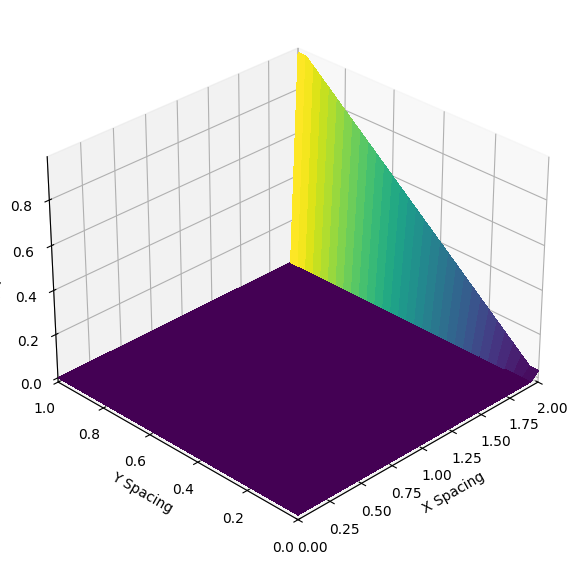

In [5]:
#Grid + initial condition + initial plot

nx = 31
ny = 31

dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

p = np.zeros((ny, nx))  # initial guess

x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

# Apply boundary conditions to initial state
p[:, 0]  = 0
p[:, -1] = y
p[0, :]  = p[1, :]
p[-1, :] = p[-2, :]

print(line)
print("Plotting Initial Solution")
print(line)

plot2D(x, y, p)
plt.show()


------------------------------------------------
Calculating Numerical Solution......
------------------------------------------------
number of iteration : 1960
------------------------------------------------
Plotting Numerical Solution
------------------------------------------------


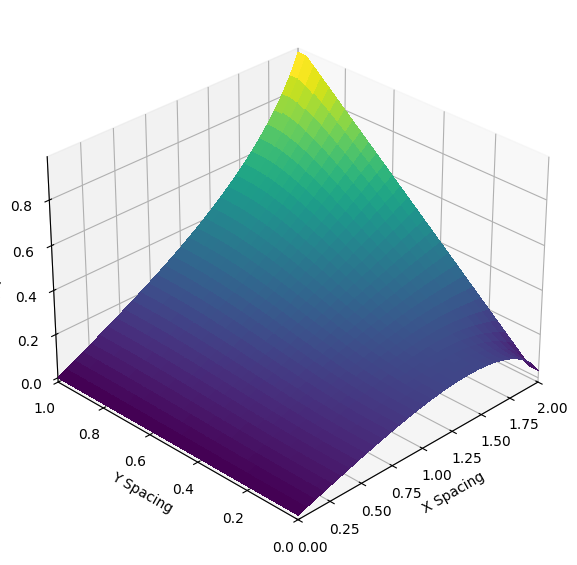

In [6]:
#Solve + plot converged solution

print(line)
print("Calculating Numerical Solution......")
print(line)

p = laplace2d(p, y, dx, dy, residual_target=1e-5)

print(line)
print("Plotting Numerical Solution")
print(line)

plot2D(x, y, p)
plt.show()
